# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint
import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
#         if len(cities)<100:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []


record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    #print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | aizkraukle
Processing record 2 of set 0 | carnarvon
Processing record 3 of set 0 | albany
Processing record 4 of set 0 | rikitea
Processing record 5 of set 0 | tangier
Processing record 6 of set 0 | luderitz
Processing record 7 of set 0 | the valley
Processing record 8 of set 0 | tura
Processing record 9 of set 0 | yellowknife
Processing record 10 of set 0 | cape town
Processing record 11 of set 0 | jamestown
Processing record 12 of set 0 | illoqqortoormiut
City not found!
Processing record 13 of set 0 | bima
Processing record 14 of set 0 | samusu
City not found!
Processing record 15 of set 0 | port alfred
Processing record 16 of set 0 | ushuaia
Processing record 17 of set 0 | castro
Processing record 18 of set 0 | lebu
Processing record 19 of set 0 | mocuba
Processing record 20 of set 0 | katsuura
Processing record 21 of set 0 | umzimvubu
City not found!
Processing record 22 of se

Processing record 41 of set 3 | tabiauea
City not found!
Processing record 42 of set 3 | ballina
Processing record 43 of set 3 | barranca
Processing record 44 of set 3 | kargil
Processing record 45 of set 3 | redmond
Processing record 46 of set 3 | teeli
Processing record 47 of set 3 | aklavik
Processing record 48 of set 3 | nouadhibou
Processing record 49 of set 3 | qinzhou
Processing record 50 of set 3 | kavaratti
Processing record 0 of set 4 | port-cartier
Processing record 1 of set 4 | aksarka
Processing record 2 of set 4 | anshun
Processing record 3 of set 4 | eureka
Processing record 4 of set 4 | ilulissat
Processing record 5 of set 4 | sentyabrskiy
City not found!
Processing record 6 of set 4 | turukhansk
Processing record 7 of set 4 | dabat
Processing record 8 of set 4 | qaqortoq
Processing record 9 of set 4 | kampene
Processing record 10 of set 4 | pevek
Processing record 11 of set 4 | somvarpet
Processing record 12 of set 4 | laguna
Processing record 13 of set 4 | dunedin
Pro

Processing record 30 of set 7 | sampit
Processing record 31 of set 7 | wuwei
Processing record 32 of set 7 | kavali
Processing record 33 of set 7 | listvyagi
Processing record 34 of set 7 | duluth
Processing record 35 of set 7 | husavik
Processing record 36 of set 7 | yar-sale
Processing record 37 of set 7 | gazojak
Processing record 38 of set 7 | bandarbeyla
Processing record 39 of set 7 | paptalaya
Processing record 40 of set 7 | boueni
Processing record 41 of set 7 | thiers
Processing record 42 of set 7 | vestmannaeyjar
Processing record 43 of set 7 | kaduqli
Processing record 44 of set 7 | tuatapere
Processing record 45 of set 7 | sitka
Processing record 46 of set 7 | yeppoon
Processing record 47 of set 7 | kamenskoye
City not found!
Processing record 48 of set 7 | ornes
Processing record 49 of set 7 | watertown
Processing record 50 of set 7 | esil
Processing record 0 of set 8 | ituni
City not found!
Processing record 1 of set 8 | pauini
Processing record 2 of set 8 | norman wells


Processing record 16 of set 11 | port hedland
Processing record 17 of set 11 | robertson
Processing record 18 of set 11 | ucluelet
Processing record 19 of set 11 | luwuk
Processing record 20 of set 11 | zelenoborsk
Processing record 21 of set 11 | strezhevoy
Processing record 22 of set 11 | segezha
Processing record 23 of set 11 | lingao
Processing record 24 of set 11 | pingyin
Processing record 25 of set 11 | lingyuan
Processing record 26 of set 11 | huilong
Processing record 27 of set 11 | vostok
Processing record 28 of set 11 | shingu
Processing record 29 of set 11 | lesozavodsk
Processing record 30 of set 11 | coahuayana
Processing record 31 of set 11 | gangotri
City not found!
Processing record 32 of set 11 | maldonado
Processing record 33 of set 11 | temnikov
Processing record 34 of set 11 | aromashevo
Processing record 35 of set 11 | anito
Processing record 36 of set 11 | santa ines
-------------------------
Data Retrieval Complete
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create a DataFrame

weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aizkraukle,0,LV,1556515372,54,56.60,25.25,44.01,3.00
1,carnarvon,0,ZA,1556515573,29,-30.97,22.13,63.41,9.13
2,albany,1,US,1556515282,80,42.65,-73.75,37.99,3.36
3,rikitea,100,PF,1556515573,71,-23.12,-134.97,73.31,26.26
4,tangier,40,GB,1556515564,93,51.02,-3.11,48.99,3.42


In [14]:
# Export to csv

weather_data.to_csv("output_data/City_Weather_Data.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

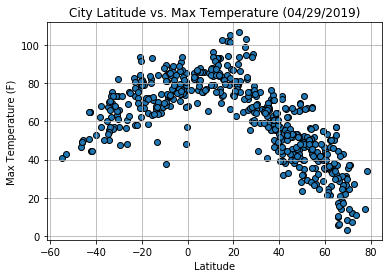

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

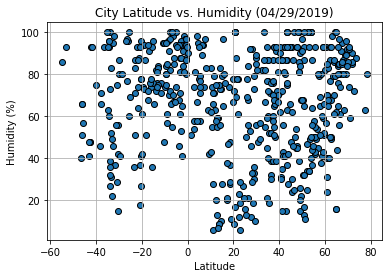

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

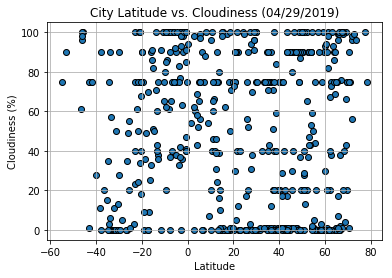

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

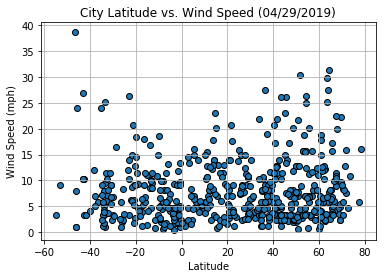

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudevsWindSpeed.png")

# Show plot
plt.show()

In [22]:
#Analysis:
#1. Weather becomes warmer as we approach the equater.
#1(continued). Northern cities are colder than Southern cities that are of equal distance from the equator
#2. There is not much relationship between latitude and wind speed.
#3. There is not much relationship between latitude and cloudiness.
#4. There is not much relationship between latitude and humidity.

